In [31]:
import pandas as pd

In [32]:
data=pd.read_csv(r"D:\Youtube_video\Logistic_regression\video4\framingham.csv")

In [33]:
data.shape

(4238, 16)

In [34]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [35]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [36]:
data=data[['male','age','currentSmoker','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP','TenYearCHD']]

In [37]:
data.head()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
0,1,39,0,0,0,0,106.0,70.0,0
1,0,46,0,0,0,0,121.0,81.0,0
2,1,48,1,0,0,0,127.5,80.0,0
3,0,61,1,0,1,0,150.0,95.0,1
4,0,46,1,0,0,0,130.0,84.0,0


In [38]:
data.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

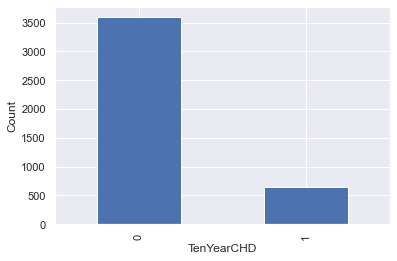

In [10]:
#checking the distribution of data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
chd_plot=data['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

In [39]:
X=pd.DataFrame(data,columns={"male","age","currentSmoker","prevalentStroke","prevalentHyp","diabetes","sysBP","diaBP"})
y=pd.DataFrame(data,columns={"TenYearCHD"})

In [40]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X))

X.head()

,0,1,2,3,4,5,6,7
0,-0.671101,-0.162477,-1.195907,-0.988271,-1.082625,1.153192,-1.234951,-0.077033
1,-0.671101,-0.162477,-0.515187,-0.988271,-0.158988,-0.867158,-0.418257,-0.077033
2,-0.671101,-0.162477,-0.220209,1.011868,-0.242955,1.153192,-0.184916,-0.077033
3,1.490089,-0.162477,0.800871,1.011868,1.016549,-0.867158,1.331800,-0.077033
4,-0.671101,-0.162477,-0.106755,1.011868,0.092912,-0.867158,-0.418257,-0.077033


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
#Training the first model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression()
log_reg_classifier.fit(X_train, y_train)
y_pred=log_reg_classifier.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Accuracy with Logistic Regression before removing insignificant columns: ',accuracy_score(y_test,y_pred))


Accuracy with Logistic Regression before removing insignificant columns:  0.8384433962264151


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       710
           1       0.56      0.04      0.07       138

    accuracy                           0.84       848
   macro avg       0.70      0.52      0.49       848
weighted avg       0.79      0.84      0.77       848



In [46]:
import pickle

In [47]:
# save the model to disk
filename = 'model.sav'
pickle.dump(log_reg_classifier, open(filename, 'wb'))

In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8384433962264151
